# Stock-to-Flow Model

The pyfinlab crypto module has within it methods for the analysis of cryptocurrencies including the ability to fit power law models to cryptocurrencies and statistically test the closeness of the fitted power law model. The workflow below is as follows: 

1. Import crypto module. 
2. Download cryptocurrency data from Coin Metrics. 
3. Collect all cryptocurrency tickers and filter out those which do not have required data. 
4. Fit a power law model to the observed stock-to-flow data with market price as dependent variable. 
5. Conduct hypothesis test to determine whether fitted power law model is statistically significant. 

In [1]:
from pyfinlab import stock_to_flow as sf

Download data updated daily by Coin Metrics from https://github.com/coinmetrics/data/tree/master/csv. Comment out if you already have today's data downloaded, otherwise, it will download data each time this cell is run and save to the coinmetrics folder within '../data/coinmetrics/' path. It takes about 2-3 minutes to complete downloading all the data.

In [2]:
sf.download()

100%|█████████████████████████████████████| 106/106 [02:32<00:00,  1.44s/it]


Display tickers for which data is available for a stock-to-flow model and for which no Error or RuntimeWarning are thrown. Refer to https://docs.coinmetrics.io/asset-metrics/network-usage/blkcnt and https://docs.coinmetrics.io/asset-metrics/supply/splycur for more information on the required inputs. The method below searches all ticker data specifically for 'blkcnt' and 'splycur' and removes tickers which have no data. Finally, the method also tries to fit a power law model to the data and filters out tickers whose data causes the parameter optimization algorithm to throw a RuntimeWarning. Tickers which have data but throws a RuntimeWarning may contain data which cannot be properly fitted to a power law curve for whatever reasons, one of which is not having a large enough sample size. 

In [3]:
tickers = sf.clean_tickers()

100%|███████████████████████████████████████| 25/25 [00:01<00:00, 19.50it/s]

Tickers which ran without raising an Error or RuntimeWarning: ['bch', 'bsv', 'btc', 'btg', 'dash', 'dcr', 'dgb', 'doge', 'etc', 'eth', 'grin', 'ltc', 'vtc', 'xmr', 'xtz', 'zec']
Number of Tickers: 25


Let's look at Bitcoin (btc), Ethereum (eth), and a more exotic cryptocurrency Dogecoin (doge). However, the following methods should work with any ticker from the list above. 

## Power Law Model

<em>ModelPriceUSD = e<sup>a</sup> * SF<sup>b</sup></em><br>

The first term is the natural exponential function of coefficient a, which is multiplied by stock-to-flow (SF) to the power of coefficient b. The Spearman R-Squared is deemed statistically significant and different from 0 if the p-value is less than 0.05 at the 95% confidence level. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. In this example, the entire available data history is used as our sample. 

H<sub>0</sub>: $\rho$ = 0, regression model is not statistically significant. <br>
H<sub>a</sub>: $\rho$ $\neq$ 0, regression model is statistically significant. <br>

You can type any ticker from the ticker list above. Let's generate a stock-to-flow model for Bitcoin (ticker: btc), estimate a prediction price, and measure the ability of the model to fit observed market value data. 

In [4]:
ticker = 'btc' # choose any ticker from above. 
p0 = [1., 1.] # initial guesses for coefficient a and b
df, params_sf = sf.stock_to_flow_model(ticker, p0, show=True)

Current Stock-to-Flow: 57.37
Current Price: $46,470.32
Model Prediction Price: $50,957.71
Potential Return%: 9.66%

Fitted Power Law Model: e^1.505 * SF^2.305
Spearman R-Squared: 0.906
Adj. Spearman R-Squared: 0.906
P-value of Correlation Coefficient: 0.0
 
Conclusion: 
[1]: Spearman R-Squared appears to be statistically significant and different from 0.
[2]: There appears to be correlation between price and stock-to-flow.


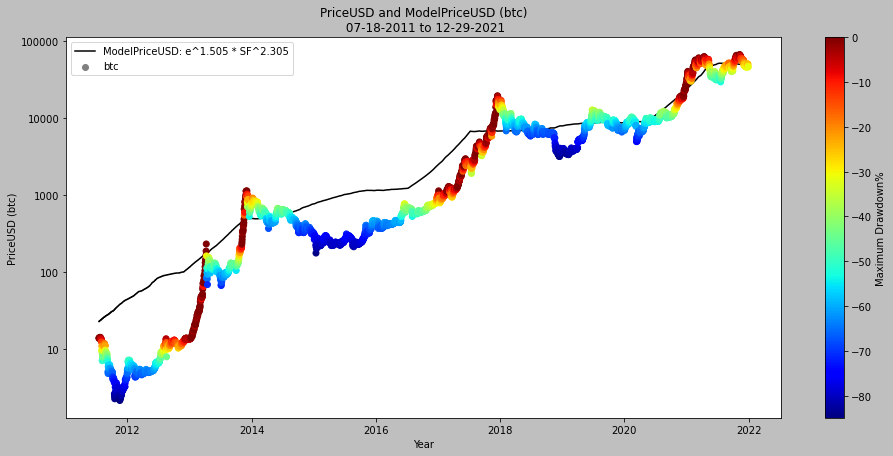

In [5]:
sf.charts(df, ticker, params_sf, chart=1, figsize=(16, 7))

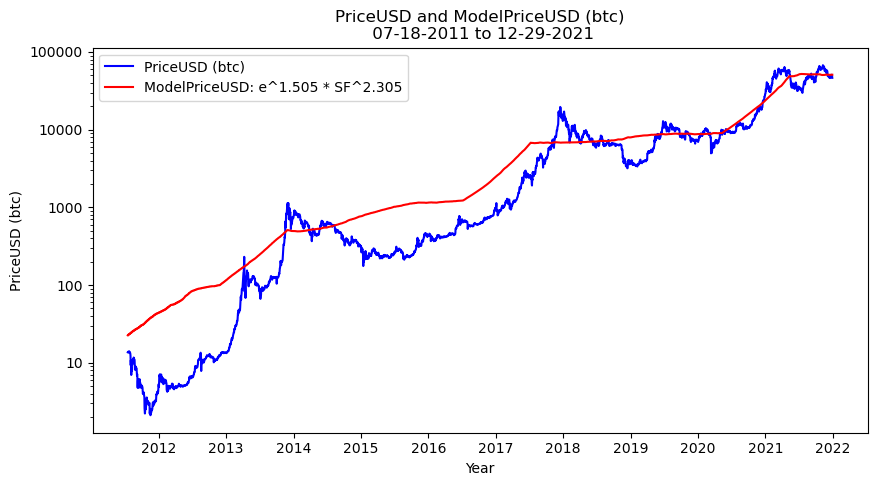

In [6]:
sf.charts(df, ticker, params_sf, chart=2, figsize=(10, 5))

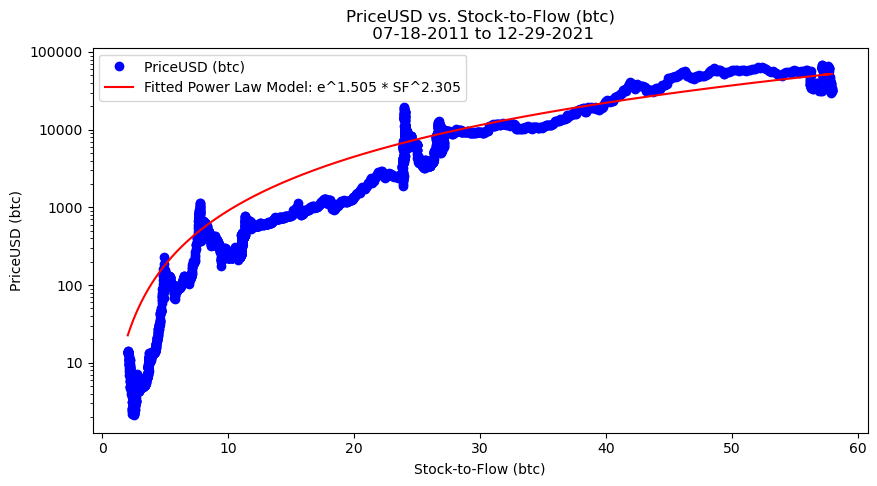

In [7]:
sf.charts(df, ticker, params_sf, chart=3, figsize=(10, 5))

## Hypothetis Test

Does the fitted power law model have statistical significance and may it possibly have explanatory value in explaining PriceUSD as a power law function of stock-to-flow? 

H<sub>0</sub>: $\beta$<sub>1</sub> = 0, regression model is not statistically significant. <br>
H<sub>a</sub>: $\beta$<sub>1</sub> $\neq$ 0, regression model is statistically significant. <br>

The following robust regression analysis adjusts standard errors to account for heteroskedasticity and autocorrelation via the Newey-West method. The condition number and presence of multicollinearity can  be ignored since there is only one indepdent variable. 

In [8]:
results = sf.regression_analysis(df, show=True)

                            OLS Regression Results                            
Dep. Variable:               PriceUSD   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2974.
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:16:03   Log-Likelihood:                -37383.
No. Observations:                3818   AIC:                         7.477e+04
Df Residuals:                    3816   BIC:                         7.478e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -436.3285     75.114     -5.809

In [9]:
sig = sf.model_significance(ticker, results)
print(sig)

                btc
f_pvalue      0.000
const_pvalue  0.000
beta_pvalue   0.000
rsquared      0.904
rsquared_adj  0.904


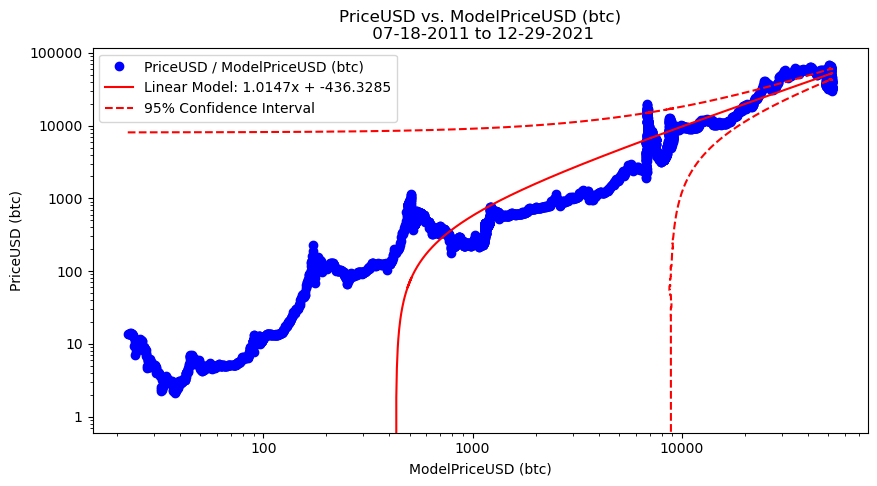

In [10]:
sf.conf_int_chart(df, ticker, results, figsize=(10, 5))

## Power Law Model Estimate

This estimate is computed based purely on the mathematical curve of the computed Power Law function. 

In [11]:
obs_ci_lower, obs_ci_upper = sf.confidence_interval(df, ticker, results, show=True)

Ticker: btc
Confidence Level: 95%
Current Value: $46,470.32
Lower 95%: $42,609.51 or -8.31%
Mean Estimate: $51,271.12 or 10.33%
Upper 95%: $59,932.73 or 28.97%


# Ethereum Stock-to-Flow Model

Let's generate a stock-to-flow model for Ethereum (ticker: eth), estimate a prediction price, and measure the ability of the model to fit observed market value data. 

In [12]:
ticker = 'eth' # choose any ticker from above. 
p0 = [1., 1.] # initial guesses for coefficient a and b
df, params_sf = sf.stock_to_flow_model(ticker, p0, show=True)

Current Stock-to-Flow: 32.61
Current Price: $3,638.66
Model Prediction Price: $5,754.70
Potential Return%: 58.15%

Fitted Power Law Model: e^-7.040 * SF^4.505
Spearman R-Squared: 0.3844
Adj. Spearman R-Squared: 0.3838
P-value of Correlation Coefficient: 0.0
 
Conclusion: 
[1]: Spearman R-Squared appears to be statistically significant and different from 0.
[2]: There appears to be correlation between price and stock-to-flow.


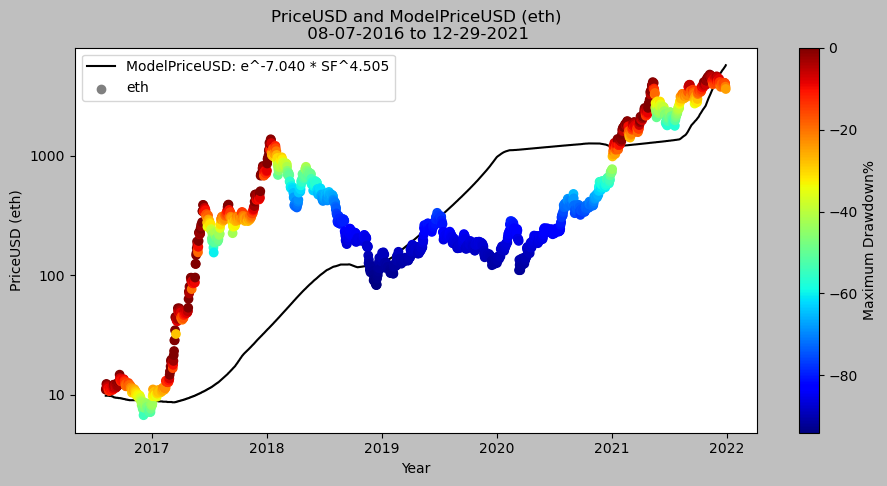

In [13]:
sf.charts(df, ticker, params_sf, chart=1, figsize=(11, 5))

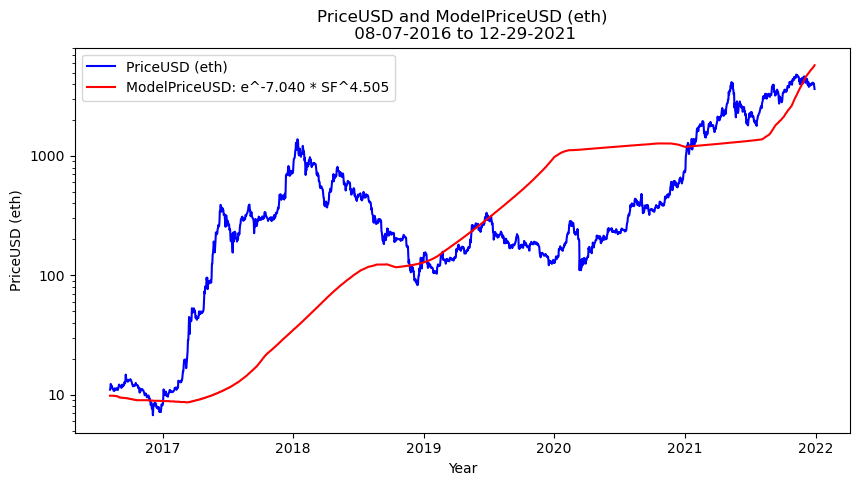

In [14]:
sf.charts(df, ticker, params_sf, chart=2, figsize=(10, 5))

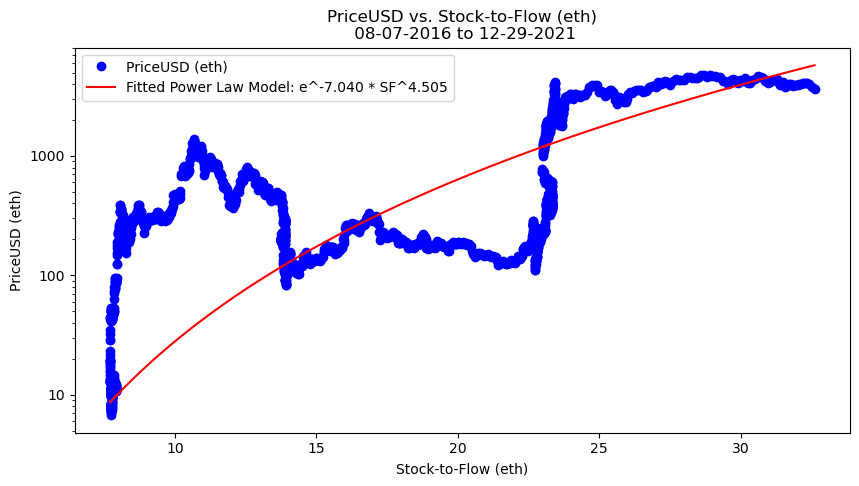

In [15]:
sf.charts(df, ticker, params_sf, chart=3, figsize=(10, 5))

## Hypothetis Test

Does the fitted power law model have statistical significance and may it possibly have explanatory value in explaining PriceUSD as a power law function of stock-to-flow? 

H<sub>0</sub>: $\beta$<sub>1</sub> = 0, regression model is not statistically significant. <br>
H<sub>a</sub>: $\beta$<sub>1</sub> $\neq$ 0, regression model is statistically significant. <br>

The following robust regression analysis adjusts standard errors to account for heteroskedasticity and autocorrelation via the Newey-West method. The condition number and presence of multicollinearity can  be ignored since there is only one indepdent variable. 

In [16]:
results = sf.regression_analysis(df, show=True)

                            OLS Regression Results                            
Dep. Variable:               PriceUSD   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     778.1
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          1.40e-144
Time:                        00:16:05   Log-Likelihood:                -15677.
No. Observations:                1971   AIC:                         3.136e+04
Df Residuals:                    1969   BIC:                         3.137e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           103.6735     19.035      5.446

In [17]:
sig = sf.model_significance(ticker, results)
print(sig)

                eth
f_pvalue      0.000
const_pvalue  0.000
beta_pvalue   0.000
rsquared      0.597
rsquared_adj  0.597


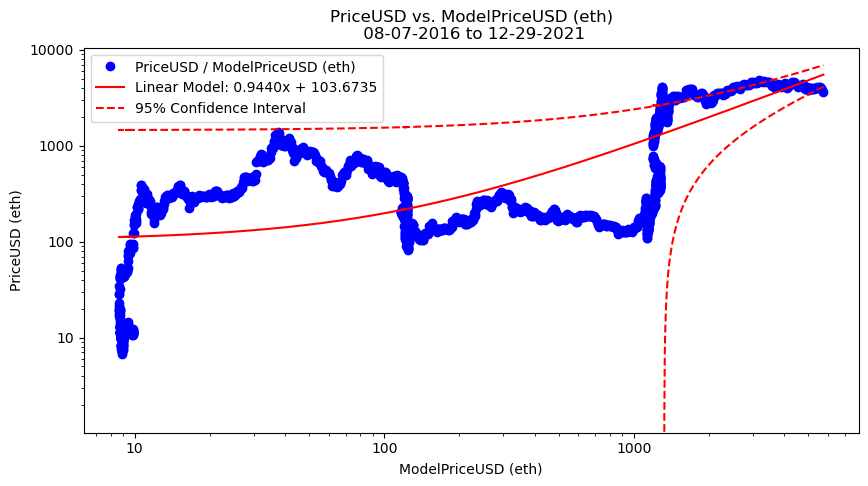

In [18]:
sf.conf_int_chart(df, ticker, results, figsize=(10, 5))

## Power Law Model Estimate

This estimate is computed based purely on the mathematical curve of the computed Power Law function. 

In [19]:
obs_ci_lower, obs_ci_upper = sf.confidence_interval(df, ticker, results, show=True)

Ticker: eth
Confidence Level: 95%
Current Value: $3,638.66
Lower 95%: $4,135.91 or 13.67%
Mean Estimate: $5,535.85 or 52.14%
Upper 95%: $6,935.79 or 90.61%


# Dogecoin Stock-to-Flow Model

Let's generate a stock-to-flow model for a more exotic cryptocurrency Dogecoin (ticker: doge), estimate a prediction price, and measure the ability of the model to fit observed market value data. 

In [20]:
ticker = 'doge' # choose any ticker from above. 
p0 = [1., 1.] # initial guesses for coefficient a and b
df, params_sf = sf.stock_to_flow_model(ticker, p0, show=True)

Current Stock-to-Flow: 26.65
Current Price: $0.17
Model Prediction Price: $0.34
Potential Return%: 100.00%

Fitted Power Law Model: e^-103.246 * SF^31.120
Spearman R-Squared: 0.3017
Adj. Spearman R-Squared: 0.3011
P-value of Correlation Coefficient: 0.0
 
Conclusion: 
[1]: Spearman R-Squared appears to be statistically significant and different from 0.
[2]: There appears to be correlation between price and stock-to-flow.


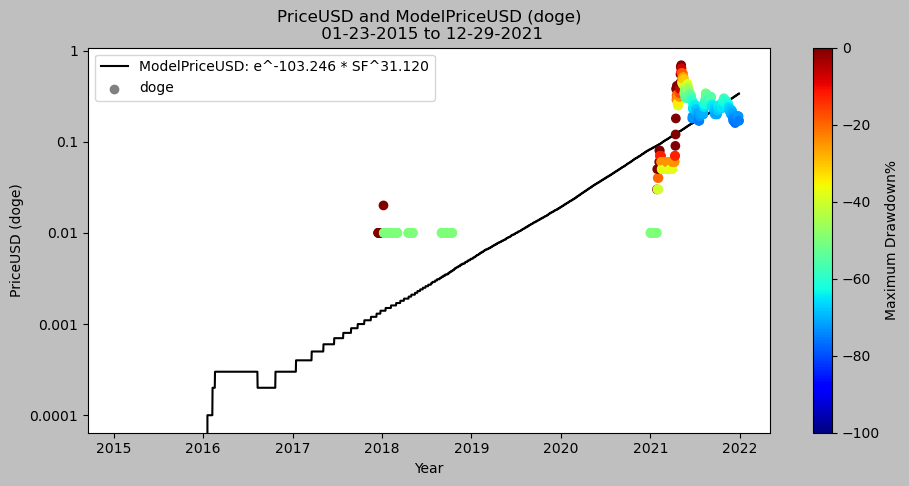

In [21]:
sf.charts(df, ticker, params_sf, chart=1, figsize=(11, 5))

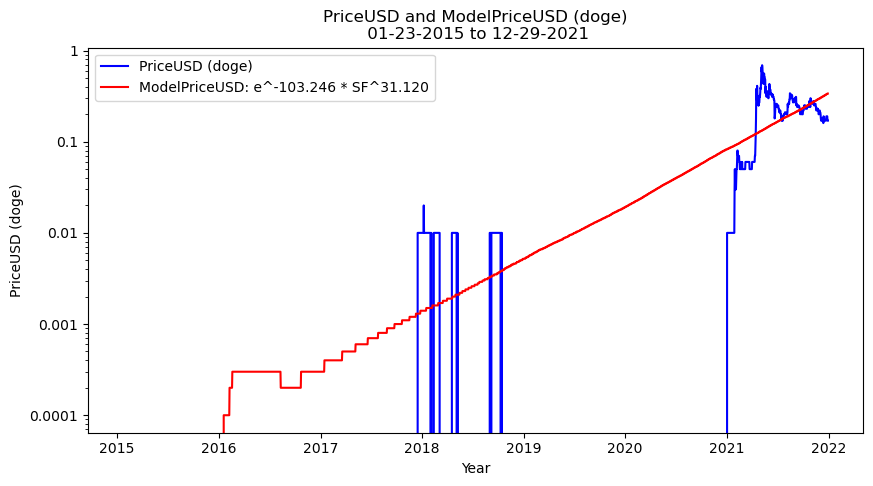

In [22]:
sf.charts(df, ticker, params_sf, chart=2, figsize=(10, 5))

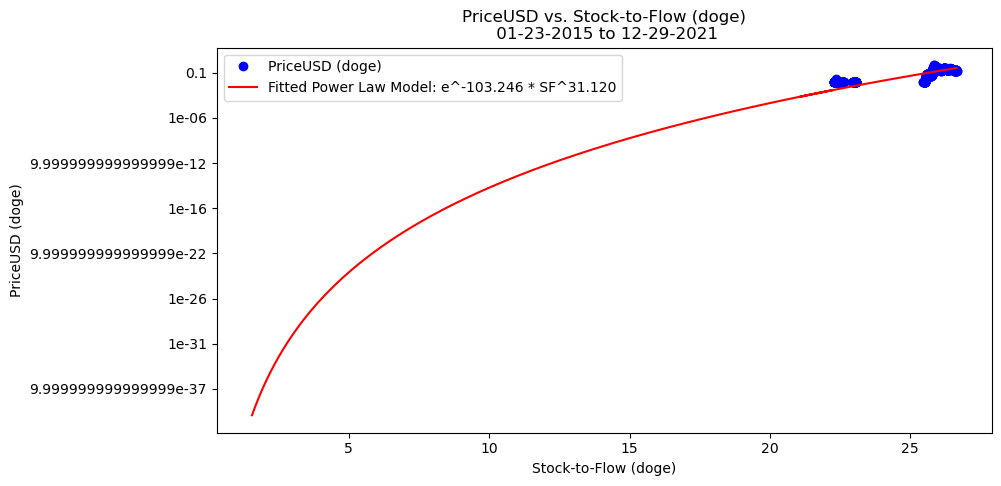

In [23]:
sf.charts(df, ticker, params_sf, chart=3, figsize=(10, 5))

## Hypothetis Test

Does the fitted power law model have statistical significance and may it possibly have explanatory value in explaining PriceUSD as a power law function of stock-to-flow? 

H<sub>0</sub>: $\beta$<sub>1</sub> = 0, regression model is not statistically significant. <br>
H<sub>a</sub>: $\beta$<sub>1</sub> $\neq$ 0, regression model is statistically significant. <br>

The following robust regression analysis adjusts standard errors to account for heteroskedasticity and autocorrelation via the Newey-West method. The condition number and presence of multicollinearity can  be ignored since there is only one indepdent variable. 

In [24]:
results = sf.regression_analysis(df, show=True)

                            OLS Regression Results                            
Dep. Variable:               PriceUSD   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     602.6
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          1.51e-119
Time:                        00:16:06   Log-Likelihood:                 3915.0
No. Observations:                2533   AIC:                            -7826.
Df Residuals:                    2531   BIC:                            -7814.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.001     -6.850

In [25]:
sig = sf.model_significance(ticker, results)
print(sig)

               doge
f_pvalue      0.000
const_pvalue  0.000
beta_pvalue   0.000
rsquared      0.643
rsquared_adj  0.643


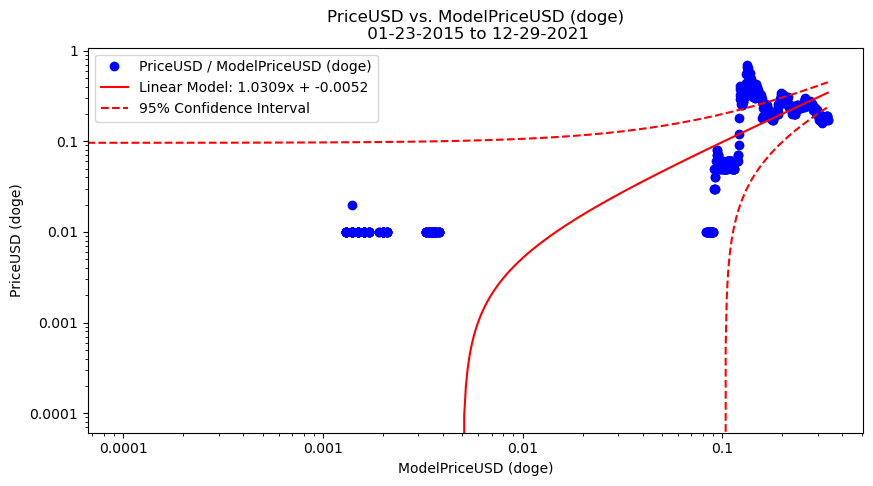

In [26]:
sf.conf_int_chart(df, ticker, results, figsize=(10, 5))

## Power Law Model Estimate

This estimate is computed based purely on the mathematical curve of the computed Power Law function. 

In [27]:
obs_ci_lower, obs_ci_upper = sf.confidence_interval(df, ticker, results, show=True)

Ticker: doge
Confidence Level: 95%
Current Value: $0.17
Lower 95%: $0.24 or 40.08%
Mean Estimate: $0.34 or 101.76%
Upper 95%: $0.45 or 163.44%
